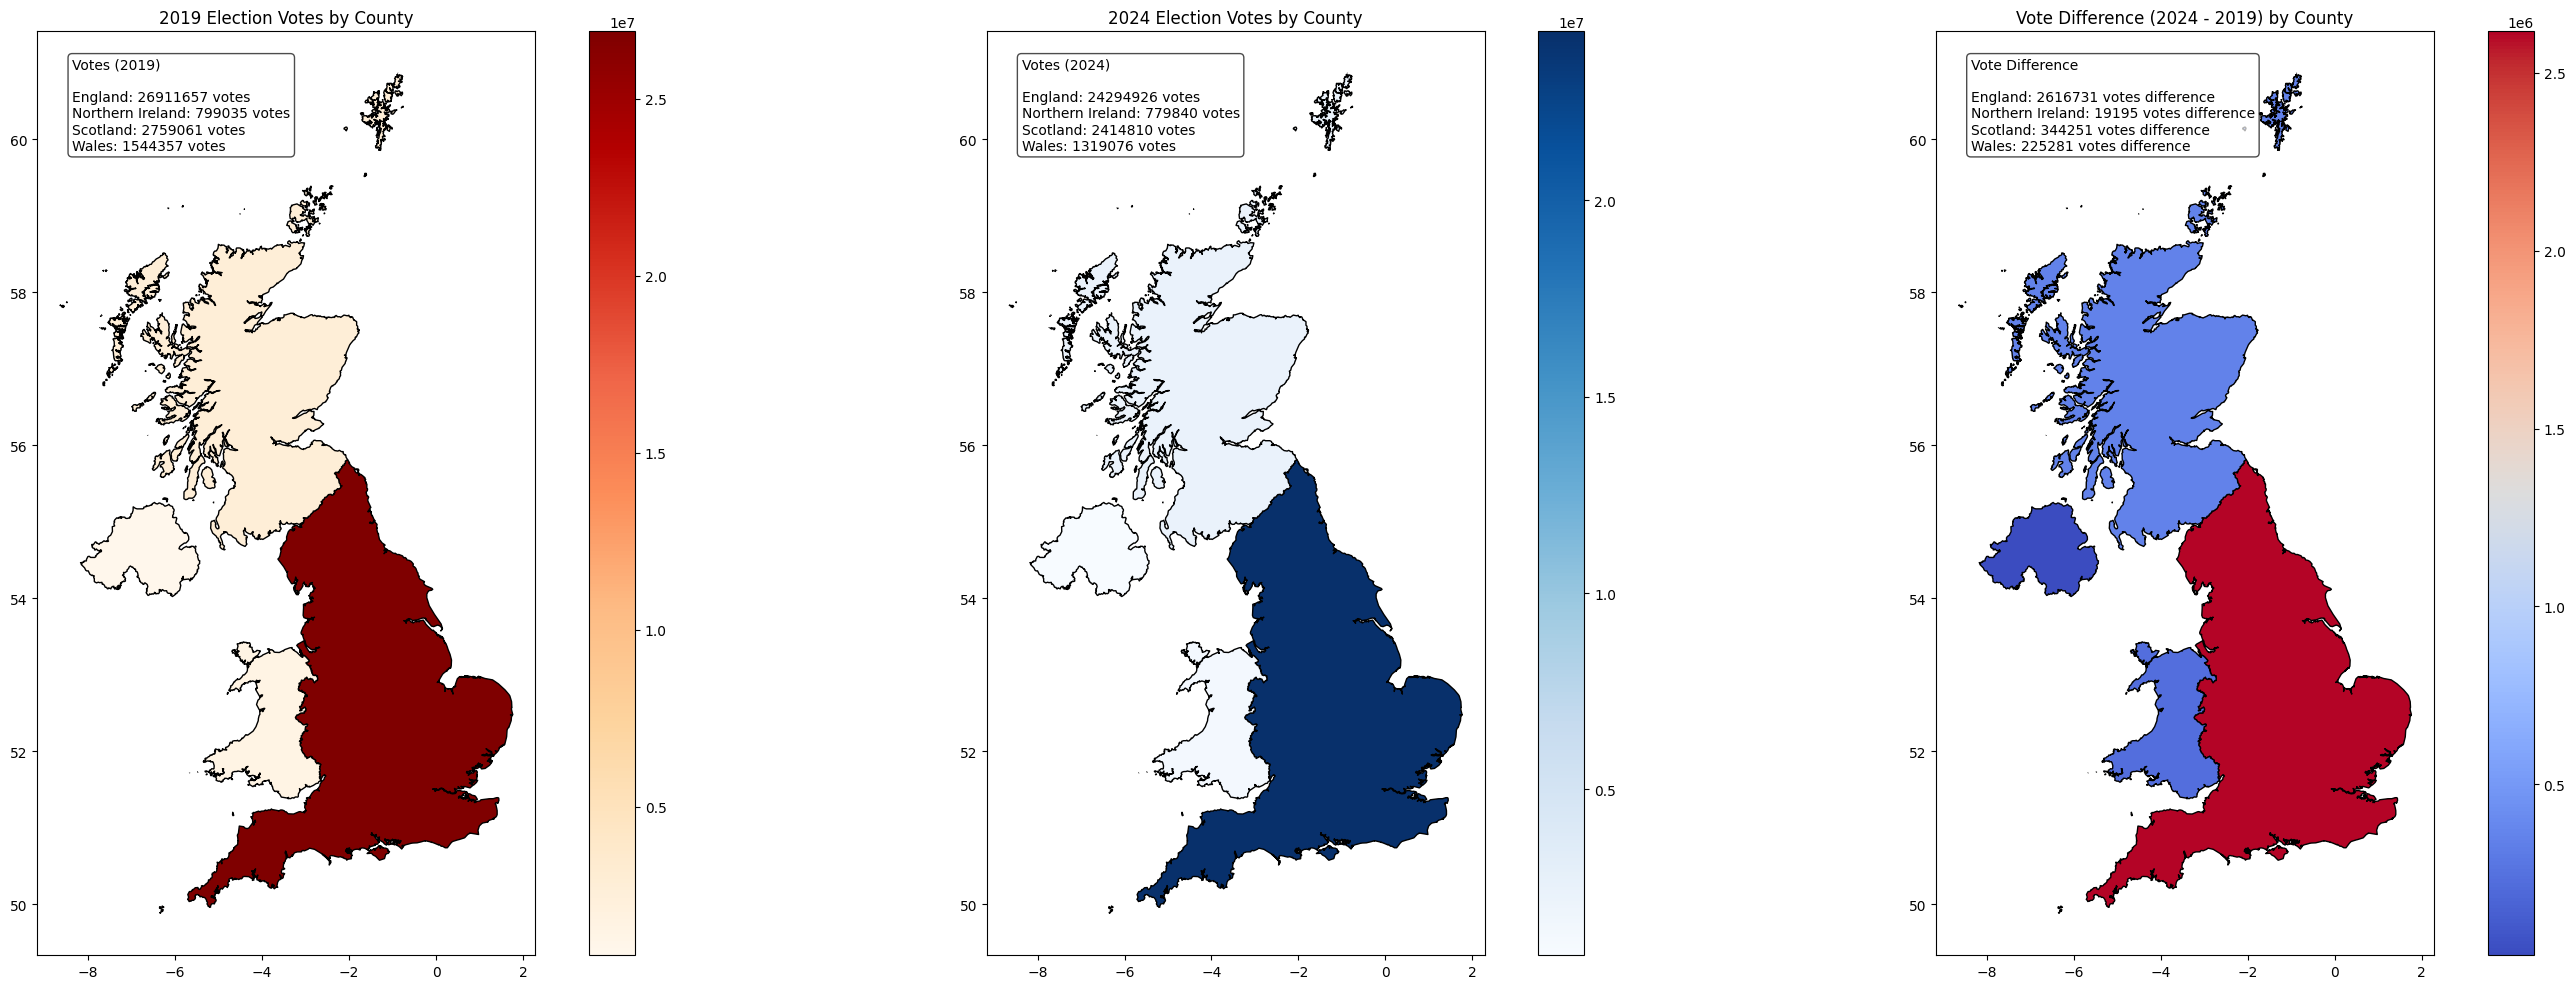

Response time: 0.144025 seconds


499999500000

In [51]:
#Manual Visualisation

import time
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Function to measure execution time
def measure_response_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Response time: {execution_time:.6f} seconds")
    return result

# Example of a function to test
def example_function(n):
    total = 0
    for i in range(n):
        total += i
    return total

# Load the GeoJSON file for county boundaries
geojson_path = "/content/GeoJSON.geojson"
gdf = gpd.read_file(geojson_path)

# Load the 2019 and 2024 election results
csv_2019_path = "/content/HoC-GE2019-results-by-candidate.csv"
csv_2024_path = "/content/HoC-GE2024-results-by-candidate.csv"

df_2019 = pd.read_csv(csv_2019_path)
df_2024 = pd.read_csv(csv_2024_path)

# Assuming the CSVs have columns 'Country name' and 'Votes', adjust as needed
df_2019_grouped = df_2019.groupby('Country name').agg({'Votes': 'sum'}).reset_index()
df_2024_grouped = df_2024.groupby('Country name').agg({'Votes': 'sum'}).reset_index()

# Merge the election data with the GeoDataFrame on the country name
gdf_2019 = gdf.merge(df_2019_grouped, left_on='CTRY23NM', right_on='Country name', how='left')
gdf_2024 = gdf.merge(df_2024_grouped, left_on='CTRY23NM', right_on='Country name', how='left')

# Calculate vote difference between 2024 and 2019 elections
df_difference = df_2024_grouped.copy()
df_difference['Votes'] = df_2019_grouped['Votes'] - df_2024_grouped['Votes']
gdf_difference = gdf.merge(df_difference, left_on='CTRY23NM', right_on='Country name', how='left')

# Plotting the map comparison side by side with vote difference
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Plot the 2019 results
gdf_2019.plot(column='Votes', ax=axes[0], legend=True, cmap='OrRd', edgecolor='black')
axes[0].set_title('2019 Election Votes by County')

# Plot the 2024 results
gdf_2024.plot(column='Votes', ax=axes[1], legend=True, cmap='Blues', edgecolor='black')
axes[1].set_title('2024 Election Votes by County')

# Plot the vote difference
gdf_difference.plot(column='Votes', ax=axes[2], legend=True, cmap='coolwarm', edgecolor='black')
axes[2].set_title('Vote Difference (2024 - 2019) by County')

# Add legends for 2019 and 2024 vote counts
votes_legend_2019 = "\n".join([f"{row['Country name']}: {int(row['Votes'])} votes" for _, row in df_2019_grouped.iterrows()])
votes_legend_2024 = "\n".join([f"{row['Country name']}: {int(row['Votes'])} votes" for _, row in df_2024_grouped.iterrows()])

# Add vote difference legend
votes_legend_diff = "\n".join([f"{row['Country name']}: {int(row['Votes'])} votes difference" for _, row in df_difference.iterrows()])

props = dict(boxstyle='round', facecolor='white', alpha=0.7)

axes[0].text(0.07, 0.92, f"Votes (2019)\n\n{votes_legend_2019}", transform=axes[0].transAxes, fontsize=10,
             verticalalignment='center', bbox=props)

axes[1].text(0.07, 0.92, f"Votes (2024)\n\n{votes_legend_2024}", transform=axes[1].transAxes, fontsize=10,
             verticalalignment='center', bbox=props)

axes[2].text(0.07, 0.92, f"Vote Difference\n\n{votes_legend_diff}", transform=axes[2].transAxes, fontsize=10,
             verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()

# Measure the response time of the example function
measure_response_time(example_function, 1000000)


<ipython-input-39-e7931df35b8d>:73: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label, votes in zip(geo_df.geometry.centroid.x,
<ipython-input-39-e7931df35b8d>:74: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_df.geometry.centroid.y,
<ipython-input-39-e7931df35b8d>:87: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label, votes in zip(geo_df.geometry.centroid.x,
<ipython-input-39-e7931df35b8d>:88: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a proj

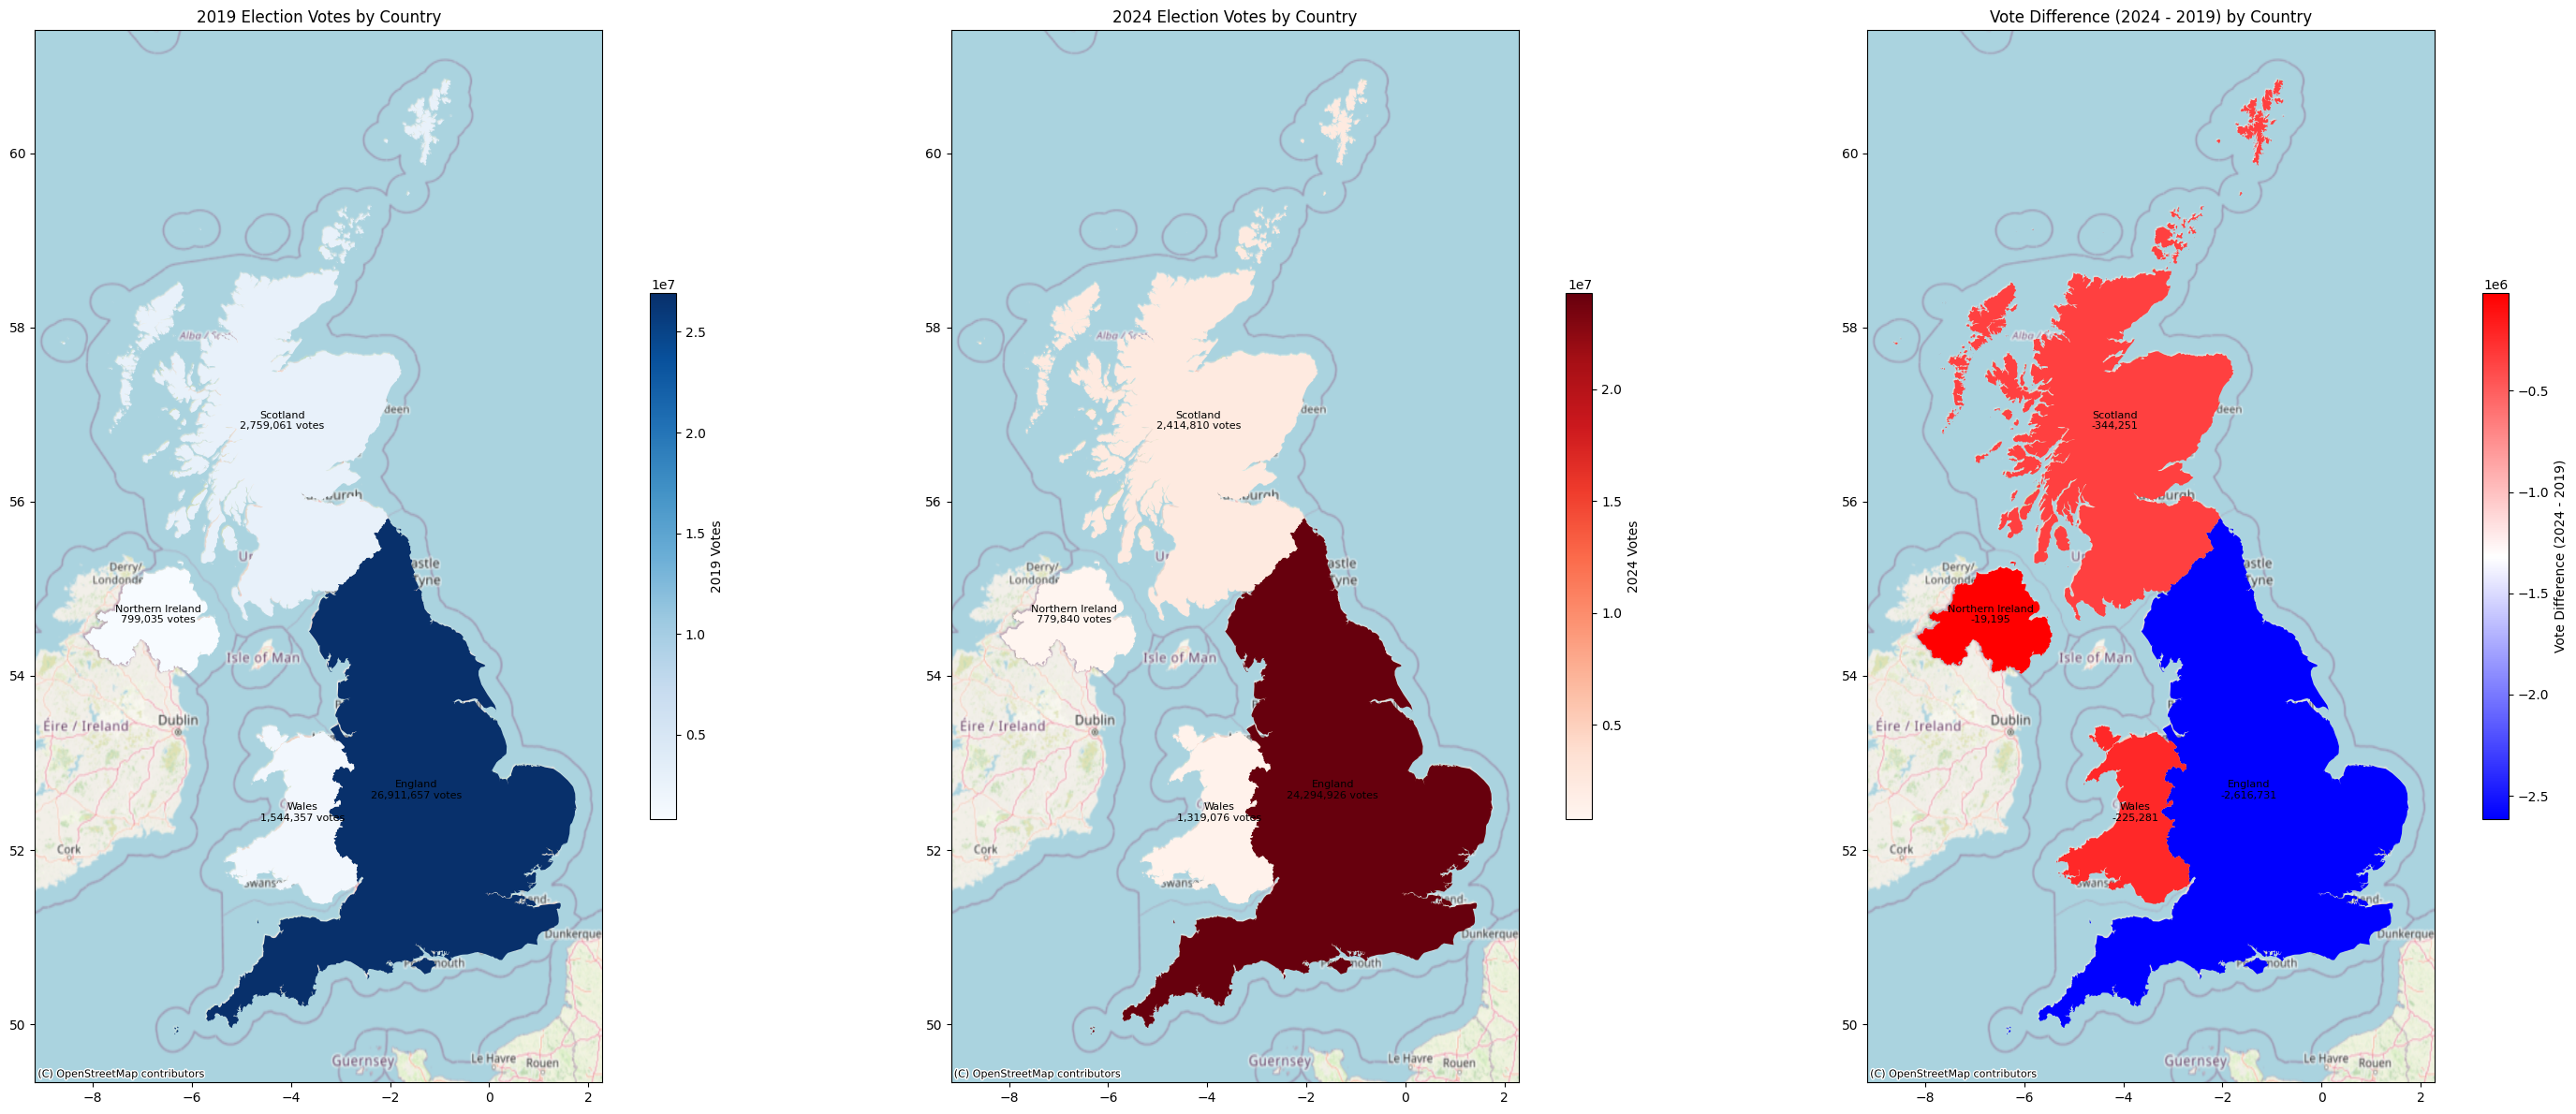

Response time: 0.168663 seconds


499999500000

In [ ]:
#ChatGPT Visualisation

import time

# Function to measure execution time
def measure_response_time(func, *args, **kwargs):
    # Record start time
    start_time = time.time()

    # Run the function
    result = func(*args, **kwargs)

    # Record end time
    end_time = time.time()

    # Calculate total execution time
    execution_time = end_time - start_time

    # Display the execution time
    print(f"Response time: {execution_time:.6f} seconds")

    return result

# Example of a function to test
def example_function(n):
    total = 0
    for i in range(n):
        total += i
    return total

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# Load GeoJSON data
geojson_file = "/content/GeoJSON.geojson"
geo_df = gpd.read_file(geojson_file)

# Load 2019 and 2024 election results
results_2019 = pd.read_csv('/content/HoC-GE2019-results-by-candidate.csv')
results_2024 = pd.read_csv('/content/HoC-GE2024-results-by-candidate.csv')

# Aggregate votes by country for 2019
votes_2019 = results_2019.groupby('Country name')['Votes'].sum().reset_index()
votes_2019.rename(columns={'Votes': 'Votes_2019'}, inplace=True)

# Aggregate votes by country for 2024
votes_2024 = results_2024.groupby('Country name')['Votes'].sum().reset_index()
votes_2024.rename(columns={'Votes': 'Votes_2024'}, inplace=True)

# Merge votes with geographical data by country name
geo_df = geo_df.merge(votes_2019, left_on='CTRY23NM', right_on='Country name', how='left')
geo_df = geo_df.merge(votes_2024, left_on='CTRY23NM', right_on='Country name', how='left')

# Calculate vote difference
geo_df['Vote_Difference'] = geo_df['Votes_2024'] - geo_df['Votes_2019']

# Handle missing values if any
geo_df['Votes_2019'] = geo_df['Votes_2019'].fillna(0)
geo_df['Votes_2024'] = geo_df['Votes_2024'].fillna(0)
geo_df['Vote_Difference'] = geo_df['Vote_Difference'].fillna(0)

# Set up the plot with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 12))

# Plot for 2019 Election Votes
geo_df.plot(column='Votes_2019', cmap='Blues', legend=True, ax=ax1,
            legend_kwds={'label': "2019 Votes", 'shrink': 0.5})
ctx.add_basemap(ax1, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels to the 2019 plot
for x, y, label, votes in zip(geo_df.geometry.centroid.x,
                              geo_df.geometry.centroid.y,
                              geo_df['CTRY23NM'],
                              geo_df['Votes_2019']):
    ax1.text(x, y, f'{label}\n{int(votes):,} votes', fontsize=8, ha='center')

ax1.set_title('2019 Election Votes by Country')

# Plot for 2024 Election Votes
geo_df.plot(column='Votes_2024', cmap='Reds', legend=True, ax=ax2,
            legend_kwds={'label': "2024 Votes", 'shrink': 0.5})
ctx.add_basemap(ax2, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels to the 2024 plot
for x, y, label, votes in zip(geo_df.geometry.centroid.x,
                              geo_df.geometry.centroid.y,
                              geo_df['CTRY23NM'],
                              geo_df['Votes_2024']):
    ax2.text(x, y, f'{label}\n{int(votes):,} votes', fontsize=8, ha='center')

ax2.set_title('2024 Election Votes by Country')

# Plot for Vote Difference
# Using a diverging colormap to show increase and decrease
geo_df.plot(column='Vote_Difference', cmap='bwr', legend=True, ax=ax3,
            legend_kwds={'label': "Vote Difference (2024 - 2019)", 'shrink': 0.5})
ctx.add_basemap(ax3, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels to the Vote Difference plot
for x, y, label, diff in zip(geo_df.geometry.centroid.x,
                              geo_df.geometry.centroid.y,
                              geo_df['CTRY23NM'],
                              geo_df['Vote_Difference']):
    ax3.text(x, y, f'{label}\n{int(diff):,}', fontsize=8, ha='center')

ax3.set_title('Vote Difference (2024 - 2019) by Country')

plt.tight_layout()
plt.show()

# Measure the response time of the example function
measure_response_time(example_function, 1000000)


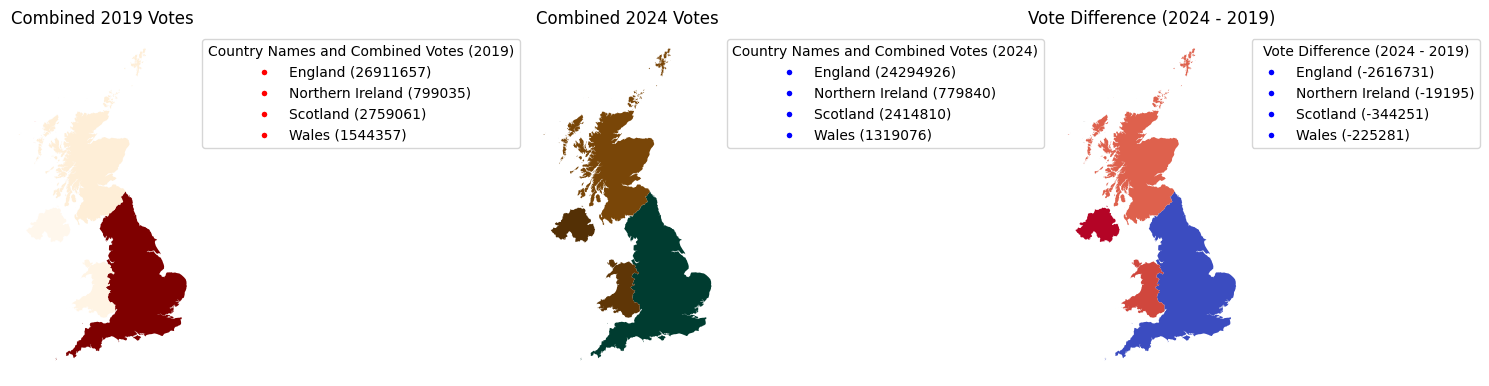

Response time: 0.163038 seconds


499999500000

In [53]:
#Code from Julius AI

import time

# Function to measure execution time
def measure_response_time(func, *args, **kwargs):
    # Record start time
    start_time = time.time()

    # Run the function
    result = func(*args, **kwargs)

    # Record end time
    end_time = time.time()

    # Calculate total execution time
    execution_time = end_time - start_time

    # Display the execution time
    print(f"Response time: {execution_time:.6f} seconds")

    return result

# Example of a function to test
def example_function(n):
    total = 0
    for i in range(n):
        total += i
    return total


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geo_df = gpd.read_file('/content/GeoJSON.geojson')

# Load the results data for 2019 and 2024
results_2019 = pd.read_csv('/content/HoC-GE2019-results-by-candidate.csv')
results_2024 = pd.read_csv('/content/HoC-GE2024-results-by-candidate.csv')

# Group the results by country name and sum the votes for 2019 and 2024
combined_2019 = results_2019.groupby('Country name')['Votes'].sum().reset_index()
combined_2024 = results_2024.groupby('Country name')['Votes'].sum().reset_index()

# Calculate the difference in votes between 2019 and 2024 for each country
vote_difference = combined_2024.set_index('Country name') - combined_2019.set_index('Country name')
vote_difference = vote_difference.reset_index()

# Merge the combined results with the GeoJSON data
merged_combined_2019 = geo_df.merge(combined_2019, left_on='CTRY23NM', right_on='Country name')
merged_combined_2024 = geo_df.merge(combined_2024, left_on='CTRY23NM', right_on='Country name')
merged_difference = geo_df.merge(vote_difference, left_on='CTRY23NM', right_on='Country name')

# Plot the combined results on a map
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Plot combined 2019 results
merged_combined_2019.plot(column='Votes', cmap='OrRd', legend=False, ax=ax[0])
ax[0].set_title('Combined 2019 Votes')
ax[0].set_axis_off()

# Plot combined 2024 results
merged_combined_2024.plot(column='Votes', cmap='BrBG', legend=False, ax=ax[1])
ax[1].set_title('Combined 2024 Votes')
ax[1].set_axis_off()


merged_difference.plot(column='Votes', cmap='coolwarm', legend=False, ax=ax[2])
ax[2].set_title('Vote Difference (2024 - 2019)')
ax[2].set_axis_off()



# Create a custom legend
handles_combined_2019 = [plt.Line2D([0], [0], marker='o', color='w', label=row['CTRY23NM'] + ' (' + str(row['Votes']) + ')',
                                    markerfacecolor='red', markersize=5) for idx, row in merged_combined_2019.iterrows()]
handles_combined_2024 = [plt.Line2D([0], [0], marker='o', color='w', label=row['CTRY23NM'] + ' (' + str(row['Votes']) + ')',
                                    markerfacecolor='blue', markersize=5) for idx, row in merged_combined_2024.iterrows()]
handles_difference = [plt.Line2D([0], [0], marker='o', color='w', label=row['CTRY23NM'] + ' (' + str(row['Votes']) + ')',
                                    markerfacecolor='blue', markersize=5) for idx, row in merged_difference.iterrows()]

# Add legends to the plots
ax[0].legend(handles=handles_combined_2019, title='Country Names and Combined Votes (2019)', loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(handles=handles_combined_2024, title='Country Names and Combined Votes (2024)', loc='upper left', bbox_to_anchor=(1, 1))
ax[2].legend(handles=handles_difference, title='Vote Difference (2024 - 2019)', loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


# Measure the response time of the example function
measure_response_time(example_function, 1000000)